In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [11]:
df = pd.read_csv('food_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [12]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [13]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [14]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [30]:
most_expensive_order = df.sort_values('cost_of_the_order', ascending=False).head(1)
most_expensive_order

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


In [33]:
cheapest_order = df.sort_values('cost_of_the_order').head(1)
cheapest_order

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26


In [32]:
longest_delivery_time = df.sort_values('delivery_time', ascending=False).head(1)
longest_delivery_time

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
989,1477545,144352,Shake Shack,American,21.93,Weekday,Not given,21,33


In [34]:
shortest_delivery_time = df.sort_values('delivery_time').head(1)
shortest_delivery_time

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
424,1477066,376381,Shake Shack,American,8.25,Weekend,Not given,30,15


In [50]:
popular_restaurants = df
popular_restaurants['rating'] = pd.to_numeric(popular_restaurants['rating'])
popular_restaurants = popular_restaurants.groupby('restaurant_name')[['restaurant_name', 'cost_of_the_order', 'rating']]
popular_restaurants = popular_restaurants.agg({'restaurant_name': 'count', 'cost_of_the_order': 'mean', 'rating': 'mean'})
popular_restaurants = popular_restaurants.rename(columns={'restaurant_name': 'num_orders', 'cost_of_the_order': 'avg_order_cost', 'rating': 'avg_rating'})
popular_restaurants.sort_values('num_orders', ascending=False).head(10)

,num_orders,avg_order_cost,avg_rating
restaurant_name,,,
Shake Shack,219,16.344886,4.278195
The Meatball Shop,132,16.251591,4.511905
Blue Ribbon Sushi,119,15.999580,4.219178
Blue Ribbon Fried Chicken,96,17.315521,4.328125
Parm,68,16.364118,4.128205
RedFarm Broadway,59,16.358136,4.243902
RedFarm Hudson,55,16.749273,4.176471
TAO,49,17.030612,4.357143
Han Dynasty,46,16.419348,4.434783


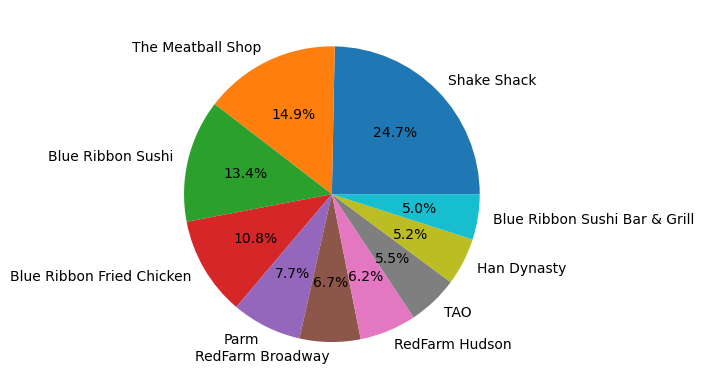

In [82]:
sorted_restaurants = popular_restaurants.sort_values('num_orders', ascending=False).head(10)
plt.pie(sorted_restaurants['num_orders'], labels=sorted_restaurants.index, autopct='%1.1f%%');

In [52]:
popular_restaurants.sort_values('avg_rating', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)

/tmp/ipykernel_41608/399299483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popular_restaurants.sort_values('avg_rating', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)


,num_orders,avg_order_cost,avg_rating
restaurant_name,,,
Blue Ribbon Sushi Bar & Grill,44,15.150455,4.590909
The Meatball Shop,132,16.251591,4.511905
Han Dynasty,46,16.419348,4.434783
TAO,49,17.030612,4.357143
Nobu Next Door,42,14.849286,4.347826
Blue Ribbon Fried Chicken,96,17.315521,4.328125
Shake Shack,219,16.344886,4.278195
RedFarm Broadway,59,16.358136,4.243902
Sushi of Gari 46,37,17.320811,4.235294


In [53]:
popular_restaurants.sort_values('avg_order_cost', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)

/tmp/ipykernel_41608/3245148096.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popular_restaurants.sort_values('avg_order_cost', ascending=False)[popular_restaurants['num_orders'] > 30].head(10)


,num_orders,avg_order_cost,avg_rating
restaurant_name,,,
Rubirosa,37,17.850000,4.125000
Sushi of Gari 46,37,17.320811,4.235294
Blue Ribbon Fried Chicken,96,17.315521,4.328125
TAO,49,17.030612,4.357143
RedFarm Hudson,55,16.749273,4.176471
Han Dynasty,46,16.419348,4.434783
Parm,68,16.364118,4.128205
RedFarm Broadway,59,16.358136,4.243902
Shake Shack,219,16.344886,4.278195


In [56]:
sales = df
sales = sales.groupby('restaurant_name')[['cost_of_the_order']].sum().rename(columns={'cost_of_the_order': 'total_sales'})
sales.sort_values('total_sales', ascending=False).head(10)

,total_sales
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


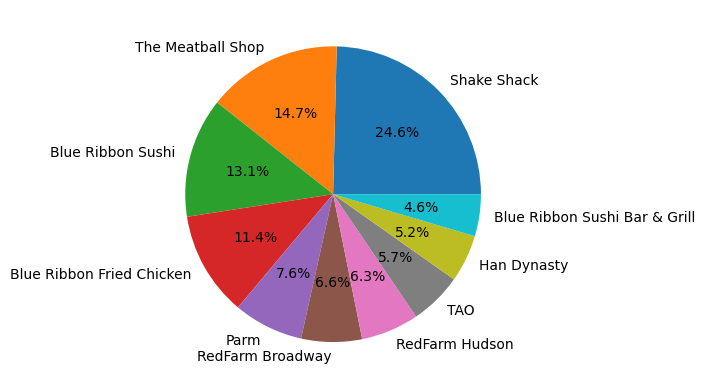

In [81]:
sorted_sales = sales.sort_values('total_sales', ascending=False).head(10)
plt.pie(sorted_sales['total_sales'], labels=sorted_sales.index, autopct='%1.1f%%');

In [22]:
popular_cuisines = df.groupby('cuisine_type')[['restaurant_name']].count().rename(columns={'restaurant_name': 'num_orders'}).sort_values('num_orders', ascending=False)
popular_cuisines

,num_orders
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [26]:
average_cost_by_cuisine = df.groupby(['cuisine_type'])[['cost_of_the_order']].mean().rename(columns={'cost_of_the_order': 'avg_cost_by_cuisine'}).sort_values('avg_cost_by_cuisine')
average_cost_by_cuisine

,avg_cost_by_cuisine
cuisine_type,
Vietnamese,12.882857
Korean,14.001538
Mediterranean,15.474783
Japanese,16.304532
Chinese,16.305209
American,16.319829
Italian,16.418691
Indian,16.919726
Mexican,16.933117


In [58]:
rating_delivery_time = df
rating_delivery_time = rating_delivery_time.groupby('rating')[['delivery_time']].mean()
rating_delivery_time

,delivery_time
rating,
3.0,24.558511
4.0,23.867876
5.0,24.212585


In [59]:
df['rating'].unique()

array([nan,  5.,  3.,  4.])

In [70]:
weekday_weekend = df
weekday_weekend = weekday_weekend.groupby('day_of_the_week')[['order_id']].count().rename(columns={'order_id': 'num_orders'})
total = weekday_weekend['num_orders'].sum()
weekday_weekend['num_orders'] = (weekday_weekend / total * 100).round(2)
weekday_weekend = weekday_weekend.rename(columns={'num_orders': 'percentage_orders'})
weekday_weekend


,percentage_orders
day_of_the_week,
Weekday,28.82
Weekend,71.18
